# MTH9875 Homework 4

## Chenyu Zhao

### R version: 3.5.1

Assigned: September 26, 2019.
Due: October 10, 2019 by 6pm.

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Allen Chen (allen.long.chen@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### Load some useful R-code

The following code sources *BlackScholes.R* which has the Black-Scholes formula and implied volatility computation and *Heston.R* which has in particular the *impvolHeston* function.

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2019/09/9875-3.zip", destfile="9875-3.zip")
unzip(zipfile="9875-3.zip")

In [1]:
source("BlackScholes.R")
source("Lewis.R")
source("Heston.R")

## Weak convergence of the Euler scheme

#### 1. (8 points) 

(a)  Denote the Euler discretization of the Heston variance process by $\hat v$ and let $
\Delta \hat v_t = \hat v_{t+\Delta}- \hat v_t
$.  Derive formal expressions for $\E[\Delta \hat v_t|v_t]$ and $\Var[\Delta \hat v_t|v_t]$ (ignore the negative variance issue).  
 

(b) Write down exact expressions for $\E[v_{t+\Delta}|v_t]$ and $\Var[v_{t+\Delta}|v_t]$ from Lecture 3.  Expand these in a power series to second order in $\Delta$.

(c) Using your results from (a) and (b), compute expressions for the discretization errors in expectation and variance to second order in $\Delta$.  Verify that the Euler discretization scheme has an $\cO(\Delta^2)$ bias, consistent with order one weak convergence. 

Tip: Use Mathematica or Wolfram Alpha. 

### Answer

(a) 

$$
\Delta \hat{v}_t = - \lambda\Delta\left(v_t-\bar v\right)+\eta\sqrt{\Delta}\sqrt{v_t}Z.
$$

therefore,

$$
\E[\Delta \hat v_t|v_t] = - \lambda\Delta\left(v_t-\bar v\right)
$$

$$
\Var[\Delta \hat v_t|v_t]=\eta^2\Delta v_t
$$

(b) 

In lecture 3,


$$
\E[\Delta v_t|v_t] = \xi_t(t+\Delta) - v_t = (v_t-\bar v)( e^{-\lambda\Delta} - 1)= -(v_t-\bar v)\left(\lambda \Delta - \frac{1}{2}\lambda^2\Delta^2+\cO(\Delta^3)\right) 
$$

$$
\Var[\Delta v_t|v_t]  = \eta^2v_t\frac{1-e^{-2\lambda\Delta}}{2\lambda} = \eta^2 v_t \left( \Delta - \lambda \Delta^2 + \cO(\Delta^3)\right)
$$

therefore

$$
\E[v_{t+\Delta}|v_t] = v_t + \E[\Delta v_t|v_t] = v_t -(v_t-\bar v)\left(\lambda \Delta - \frac{1}{2}\lambda^2\Delta^2+\cO(\Delta^3)\right) 
$$

$$
\Var[v_{t+\Delta}|v_t] = \Var[\Delta v_t|v_t] = \eta^2 v_t \left( \Delta - \lambda \Delta^2 + \cO(\Delta^3)\right)
$$

(c)

$$
 \E[\Delta v_t|v_t]\approx \E[\Delta \hat v_t|v_t] + \frac{1}{2}\lambda^2(v_t-\bar v)\Delta^2
$$

so the discretization errors in expectation is 

$$
\E[\Delta v_t|v_t] - \E[\Delta \hat v_t|v_t] \approx \frac{1}{2}\lambda^2(v_t-\bar v)\Delta^2
$$

And for
$$
\Var [\Delta v_t|v_t]  \approx \Var[\Delta \hat v_t|v_t] -\lambda\eta^2 v_t \Delta^2
$$

so the discretization errors in variance is  

$$
\Var [\Delta v_t|v_t] - \Var[\Delta \hat v_t|v_t] \approx -\lambda\eta^2 v_t \Delta^2
$$


These errors are second order and are consistent with order one weak convergence.

## The exponential martingale

#### 2. (6 points)


If $B_t$ is Brownian motion, show that

$$
X_t=e^{\int_0^t \sigma_s\,dB_s-\frac12\,\int_0^t\,\sigma_s^2\,ds}
$$

is a martingale. (Hint:  Apply Itô's Lemma to $e^Y$ where $Y=\log X$.)

Deduce that

$$
e^{\frac12\,\alpha^2\,t}=\E\left[e^{\alpha\,\sqrt{t}\,Z}\right]
%\label{eq:expmartingale}
$$

where $Z \sim N(0,1)$.  Is this last equation still true if $\alpha$ is a matrix?  Why?

### Answer

$$
de^Y = e^Y dY+\frac12 e^Yd[Y,Y]
$$

therefore
$$
dX_t = X_t(\sigma_t dB_t-\frac12 \sigma_t^2dt) +\frac12 X_t \sigma_t^2dt = \sigma_tX_tdB_t
$$

Because $dX_t$ has no drift term, so it is a martingale.

Let $\sigma_t = \alpha$, we have $X_t=e^{ \alpha B_t-\frac12 \alpha^2 t}$ is a martingale. So we have 

$$
E[X_t] = X_0 = 0 =\E\left[e^{\alpha B_t}\right] - e^{\frac12\,\alpha^2\,t}
$$

Because $B_t = \sqrt{t} Z$, we have

$$
e^{\frac12\,\alpha^2\,t}=\E\left[e^{\alpha\,\sqrt{t}\,Z}\right]
%\label{eq:expmartingale}
$$


If $\alpha$ is a matrix, we can apply Taylor expansion to RHS and use the fact that $E[Z] = 1$ and $E[Z^２]=1$, to get this formula is still true.

$$
\E\left[e^{\alpha\,\sqrt{t}\,Z}\right] = \E\left[1+\alpha\,\sqrt{t}\,Z + \frac12\alpha^2tZ^2+\dots \right] = 1+\frac12\alpha^2tZ^2+\dots=e^{\frac12\,\alpha^2\,t}
$$

## Strang splitting

#### 3. (4 points) 

If $A$ and $B$ are (in general non-commutative) matrices, show that

$$
e^{(A+B)\,\Delta}=e^{A\,\Delta/2}\,e^{B\,\Delta}\,e^{A\,\Delta/2} + \cO(\Delta^3).
$$

### Answer

Apply Taylor expansion to LHS
$$
e^{(A+B)\Delta}=1+(A+B)\Delta+\frac12(A+B)^2\Delta^2+\cO(\Delta^3)
$$

Apply Taylor expansion to each term on RHS and ignore the high order term
$$
e^{A\Delta/2}e^{B\Delta}e^{A\Delta/2} = \left[1+\frac{1}{2}A\Delta+\frac{1}{8}A^2\Delta^2+\cO(\Delta^3)\right]\left[1+B\Delta+\frac{1}{2}B^2\Delta^2+\cO(\Delta^3)\right]\left[1+\frac{1}{2}A\Delta+\frac{1}{8}A^2\Delta^2+\cO(\Delta^3)\right]
= 1+(A+B)\Delta+\frac{1}{2}(A^2+B^2+AB+BA)\Delta^2+\cO(\Delta^3)
= 1+(A+B)\Delta+\frac{1}{2}(A+B)^2\Delta^2+\cO(\Delta^3)
$$

They are identical, so we have
$$
e^{(A+B)\Delta}=e^{A\Delta/2}e^{B\Delta}e^{A\Delta/2}+\cO(\Delta^3)
$$

## Ninomiya-Victoir

#### 4. (16 points)

Consider the following variance  process:

<a name="eq:varProcess"></a>(1)
$$
dv_t = -\lambda\,(v_t-\bar v)\,dt+\xi\,v_t\,dZ_t.
%\label{eq:vProcess}
$$

(a)
Let $f(v,t)=\E[g(v_T)|\cF_t]$ be the fair value at time $t$ of some claim on $v_T$.  Apply Itô's Lemma to $f$ to find the infinitesimal generator $ \cL$ of the diffusion such that 

$$
\frac{df}{dt}+ \cL f=0.
$$

(b)
Find first order differential operators $ V_0$ and $V_1$ such that

$$
 \cL= V_0+\frac12\,V_1^2.
$$

(c)  Solve the ODEs 

$$
 \frac{d }{dt} v(t) = V_0 v(t) \text{ and }  \frac{d }{dt} v(t) = V_1 v(t)
$$

with boundary condition $v(0)=v_0$.

(d)
Deduce the form of the Ninomiya-Victoir Monte Carlo time step for the variance process [(1)](#eq:varProcess) over some small time interval from $t$ to $t+\Delta$.

### Answer

(a)

\begin{eqnarray}
df &=& f_t dt+f_vdv+\frac12f_{vv}d[v,v]\\
&=&f_tdt -\lambda(v_t-\bar v)f_v dt+\xi v_tf_vdZ_t+\frac12 f_{vv}\xi^2 v_t^2 dt
\end{eqnarray}

Becuase $f$ is a martingale, so drift term is 0. 

$$
f_t -\lambda(v_t-\bar v)f_v+\frac12 f_{vv}\xi^2 v_t^2 = 0
$$

therefore,

$$
\cL = -\lambda(v-\bar v)\frac{\partial}{\partial v}+\frac12 \xi^2 v^2\frac{\partial^2}{\partial v^2}
$$

(b) 

let $V_1 = \xi v\frac{\partial}{\partial v}$, so

$$
V_1^2 =\xi^2 v\frac{\partial}{\partial v}\left(v\frac{\partial}{\partial v} \right)= \xi^2 v^2  \frac{\partial^2}{\partial v^2}+\xi^2 v \frac{\partial}{\partial v}
$$

so $V_0 = \cL - \frac12 V_1^2 = -\lambda(v-\bar v )\frac{\partial}{\partial v}-\frac12 \xi^2v \frac{\partial}{\partial v}$

(c)

For the first ODE,

$$
\frac{d }{dt} v(t) = V_0 v(t) = -\lambda(v-\bar v)-\frac12 \xi^2 v
$$

solve and we get

$$
v(t)=\left(v_0-\frac{\lambda \bar v}{\lambda+\frac{1}{2}\xi^2}\right)e^{\left(-\lambda-\frac{1}{2}\xi^2\right)t}+\frac{\lambda \bar v}{\lambda+\frac{1}{2}\xi^2}
$$

For the second ODE, 

$$
\frac{d }{dt} v(t) = V_1 v(t) = \xi v 
$$

solve and we get

$$
v(t) = e^{\xi t}v_0
$$

(d)

To make notation simple, let $\bar v' = \frac{\lambda \bar v}{\lambda+\frac{1}{2}\xi^2}$
\begin{eqnarray}
v(t+\Delta)&=&e^{V_0\Delta+V_1\sqrt{\Delta}Z}v(t)\\
&=& e^{V_0\Delta/2}e^{V_1\sqrt{\Delta}Z}e^{V_0\Delta/2}v(t)\\
&=&e^{V_0\Delta/2}e^{\xi\sqrt{\Delta}Z}\left[(v(t)-\bar v')e^{\left(-\lambda-\frac{1}{2}\xi^2\right)\Delta/2}+\bar v'\right]\\
&=&\left(e^{\xi\sqrt{\Delta}Z}\left[(v(t)-\bar v')e^{\left(-\lambda-\frac{1}{2}\xi^2\right)\Delta/2}+\bar v'\right]-\bar v'\right)e^{\left(-\lambda-\frac{1}{2}\xi^2\right)\Delta/2}+\bar v'
\end{eqnarray}

## Amend the Monte Carlo code and generate samples

First we need to load libraries.

In [2]:
library(repr)
options(repr.plot.height=5)

#### 5. (20 points) 

(a)

Amend the Monte Carlo code (`HestonMC2`) from Lecture 4 to return vectors of $x_T=\log S_T/S_0$ and instantaneous variance $v_T$ with $T = 1$ year.

(b)

Run this amended routine with BCC parameters,  $N=1,000,000$, $m=8$ (16 steps), `evolve=evolveAlfonsiF` .  Save the results so you can reuse these samples of $x$ and $v$. (This takes around 7 seconds on my machine).

(c)

Plot the Heston implied volatility smile from the quasi-closed-form Heston formula.  Superimpose the Monte Carlo (MC) smile to reproduce something like Figure 10 in Lecture 4.

(d)

Using your MC samples of $x_T$ and $v_T$, numerically estimate the local volatility function

$$
v_\ell(x,1)=\E[v_1|x_1=x]
$$

and plot $v_\ell(x,1)$ as a function of $x$.  (Tip: I recommend binning the data rather than running *e.g.* kernel regression.)

(e)

Superimpose the Heston implied variance smile from part (c) on your local variance smile from part (d) to reproduce something like Figure 11 of Lecture 4.  

(f)
Comment on the qualitative features of the implied volatility and local volatility smiles.

### Answer 

(a)

In [3]:
HestonMC2 <- function(params){
    
    is.even <- function(j){as.logical((j+1) %% 2)}
    
    res <- function(S0, T, AK, N, m, evolve,exactVols=NULL)
    {
  
    lambda <<- params$lambda;
    rho <<- params$rho;
    eta <<- params$eta;
    vbar <<- params$vbar;
    v0 <<- params$v;
  
    n <- m*2; #n is number of timesteps = 2*m so we can use Romberg extrapolation
    sqrt2 <- sqrt(2);
    rho2m1 <<- sqrt(1-rho*rho);
    vbarp <<- vbar - eta^2/(4*lambda);
    
    negCount <- 0;
    
    # We use a vertical array, one element per M.C. path
    x <- rep(0,N); v <- rep(1,N)*v0;
    xm <- x; vm <- v;
    W1m <- rep(0,N); W2m <- rep(0,N); 
  
    # Loop for bias computation (N small, n big)
    for (i in 1:n)
    {
        # Two sets of correlated normal random vars.
        
        W1 <- rnorm(N);
        W2 <- rnorm(N);
        W1 <- W1 - mean(W1); W1 <- W1/sd(W1);
        W2 <- W2 - mean(W2); W2 <- W2/sd(W2);
        # Now W1 and W2 are forced to have mean=0 and sd=1
        
        W2p <- W2 - cor(W1,W2)*W1; # Eliminate actual correlation
        W2p <- W2p - mean(W2p); W2 <- W2p/sd(W2p); 
        # Now W1 and W2 have mean=0, sd=1 and correlation=0
        
        L <- rbinom(N, size=1, prob=1/2); # Bernoulli rv for NV step
    
        # Add code for subgrid
        W1m <- W1m + W1/sqrt2; W2m <- W2m + W2/sqrt2; # N(0,1) rv's for subgrid
       
        if (is.even(i)) {
            #print(c(i,mean(W1m),mean(W2m),sd(W1m),sd(W2m),cor(W1m,W2m)));
            resm <- evolve(vm,xm,T/m,W1m,W2m,L);
            xm <- resm[,1];
            vm <- resm[,2];
            W1m <- rep(0,N); W2m <- rep(0,N);
        }
    
        res <- evolve(v,x,T/n,W1,W2,L);
        x <- res[,1];
        v <- res[,2];
        negCount <- negCount +mean(v<0)/n; #Probability of negative variance per path per timestep
    
  }

    S <- S0*exp(x);
    Sm <- S0*exp(xm);

    # Now we have three vectors of final stock prices
  
    M <- length(AK);
    AV <- numeric(M); AVdev <- numeric(M);
    BSV <- numeric(M); BSVH <- numeric(M); BSVL <- numeric(M);
    iv2SD <- numeric(M); bias <- numeric(M);
    AVm <- numeric(M); AVmdev <- numeric(M);
    BSVm <- numeric(M); BSVHm <- numeric(M); BSVLm <- numeric(M);
    iv2SDm <- numeric(M);
    AV1 <- numeric(M); AV1dev <- numeric(M);
    BSV1 <- numeric(M); BSVH1 <- numeric(M); BSVL1 <- numeric(M);
    iv2SDrom <- numeric(M);biasRom <- numeric(M);
  
  # Evaluate mean call value for each path
  for (i in 1:M)
  {
    # 2*m timesteps
    K <- AK[i];
    V <- (S>K)*(S - K); # Boundary condition for European call
    AV[i] <- mean(V);
    AVdev[i] <- sqrt(var(V)/length(V));  
    
    BSV[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i]);
    BSVL[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i] - AVdev[i]);
    BSVH[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i] + AVdev[i]);
    iv2SD[i] <- (BSVH[i]-BSVL[i]);
    
    # m timesteps
    Vm <- (Sm>K)*(Sm - K); # Boundary condition for European call
    AVm[i] <- mean(Vm);
    AVmdev[i] <- sd(Vm) / sqrt(N);
    BSVm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i]);
    BSVLm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i] - AVmdev[i]);
    BSVHm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i] + AVmdev[i]);
    iv2SDm[i] <- (BSVH[i]-BSVL[i]);
    
    # Richardson extrapolation estimates 
    V1 <- 2*V - Vm;
    AV1[i] <- mean(V1);
    AV1dev[i] <- sd(V1) / sqrt(N);
    BSV1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i]);
    BSVL1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i] - AV1dev[i]);
    BSVH1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i] + AV1dev[i]);
    iv2SDrom[i] <- (BSVH1[i]-BSVL1[i]);
    
    if(!is.null(exactVols)) {bias <- BSV-exactVols};
    if(!is.null(exactVols)) {biasRom <- BSV1-exactVols};
  }
  
  
  l.AK <- length(AK)      
  data.out <- data.frame(AK,rep(N,l.AK),rep(2*m,l.AK),BSV,bias,iv2SD,BSVm,BSV1,biasRom,iv2SDrom) 
  names(data.out) <- c("Strikes","Paths","Steps","ivol","bias","twoSd","ivolm", "ivolRichardson", "biasRichardson","twoSdRichardson") 
  results <- list("impliedVol"=data.out,"x"=x,"v"=v)
  return(results) 
}
return(res)
}

(b)

In [4]:
evolveAlfonsiF <- function(v,x,dt,W1,W2,L=NULL){

    eldt2 <- exp(-lambda*dt/2);

    #Variance process
    vbarp <- vbar - eta^2/(4*lambda);
    psi <- (1-eldt2)/lambda;
    v1 <- v*eldt2+lambda*vbarp*psi;
    v2 <- (v1 > 0) * v1; # Take v2 = 0 if v1<0, else v2=v1
    par <- sqrt(v2) + eta/2 * sqrt(dt)*W2;
    vf <- eldt2*par*par +lambda*vbarp*psi + v1 - v2;

    # Log-stock process (Andersen equation (33))
    vvf <- (v+vf > 0) * (v+vf);
    dw <- vvf/2*dt;
    x <- x  - dw/2 + rho2m1*sqrt(dw)*W1 + rho/eta*(lambda*dw + vf-v -lambda*vbar*dt) ;
    # Impose martingale constraint
    x <- x - log(mean(exp(x)));
    v <- vf;
    return(cbind(x,v));
}

paramsBCC <- list(lambda = 1.15,rho = -0.64,eta = 0.39,vbar = 0.04,v = 0.04)

In [5]:
impvolHeston <- function(K)
{
    impvol.phi(phiHeston(paramsBCC))(log(K), 1.0)
}

impvolHeston <- Vectorize(impvolHeston)

Ks<-c(0.8,1.0,1.2)
HestonVols <- sapply(Ks, impvolHeston)

In [6]:
res <- HestonMC2(paramsBCC)(S0=1, T=1, AK=Ks, N=1000000, m=8, evolve=evolveAlfonsiF, exactVols=HestonVols)
xMC <- res$x
vMC <- res$v
print(res$impliedVol)

  Strikes Paths Steps      ivol          bias        twoSd     ivolm
1     0.8 1e+06    16 0.2289730 -2.271467e-05 0.0013878797 0.2288643
2     1.0 1e+06    16 0.1817397  1.155262e-05 0.0004938545 0.1816400
3     1.2 1e+06    16 0.1521745  1.266992e-04 0.0003566589 0.1521956
  ivolRichardson biasRichardson twoSdRichardson
1      0.2290817   8.593313e-05    0.0014110118
2      0.1818394   1.112142e-04    0.0005073696
3      0.1521533   1.055675e-04    0.0003723614


(c)

In [7]:
impvolMC <- function(K)
{
    S <- exp(xMC);
    V <- (S > K) * (S - K);
    mean_V <- mean(V);
    res <- BSImpliedVolCall(1, K, 1, 0, mean_V);
    return (res)
}

In [8]:
Ks<-seq(0.5,1.5,0.05)
impvol_MC<-sapply(Ks,impvolMC)
impvol_heston<-sapply(Ks,impvolHeston)

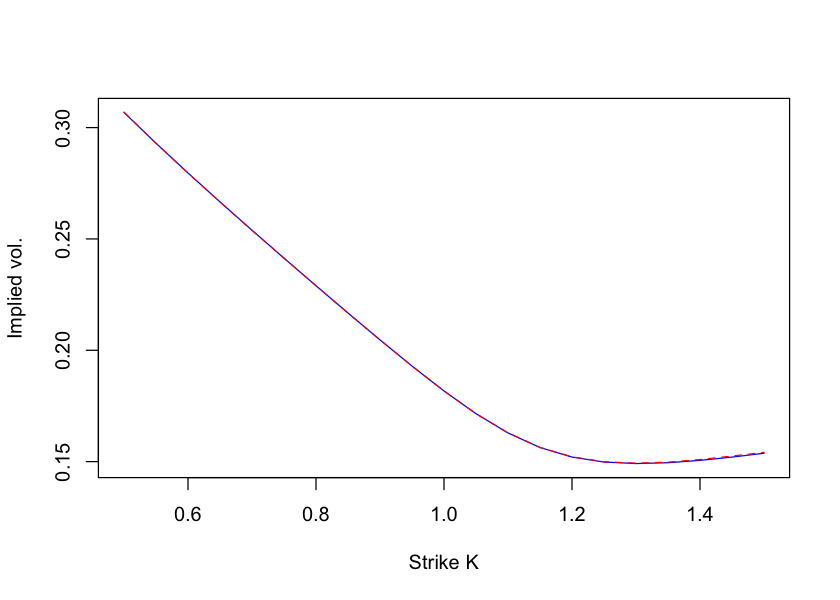

In [9]:
plot(Ks,impvol_heston,type="l", lty=1, col="blue", xlab="Strike K", ylab="Implied vol.")
lines(Ks,impvol_MC, col="red", lty=2)

(d)(e)

In [10]:
xvMC<-cbind(xMC,vMC)
xvMC<-data.frame(xvMC)
colnames(xvMC)<-c("x_sample","v_sample")
x_min<-min(xvMC[,"x_sample"])
x_max<-max(xvMC[,"x_sample"])
bins<-100
itv<-(x_max-x_min)/bins

In [11]:
localVar<-function(x)
{
    i<-floor((x-x_min)/itv)
    xl<-x_min+i*itv
    xh<-x_min+(i+1)*itv
    xvMC.subset<-subset(xvMC,x_sample>=xl&x_sample<xh)
    v_mean<-mean(xvMC.subset[,"v_sample"])
    v_std<-sd(xvMC.subset[,"v_sample"])/sqrt(dim(xvMC.subset)[1])
    return(cbind(v_mean,v_std))
}

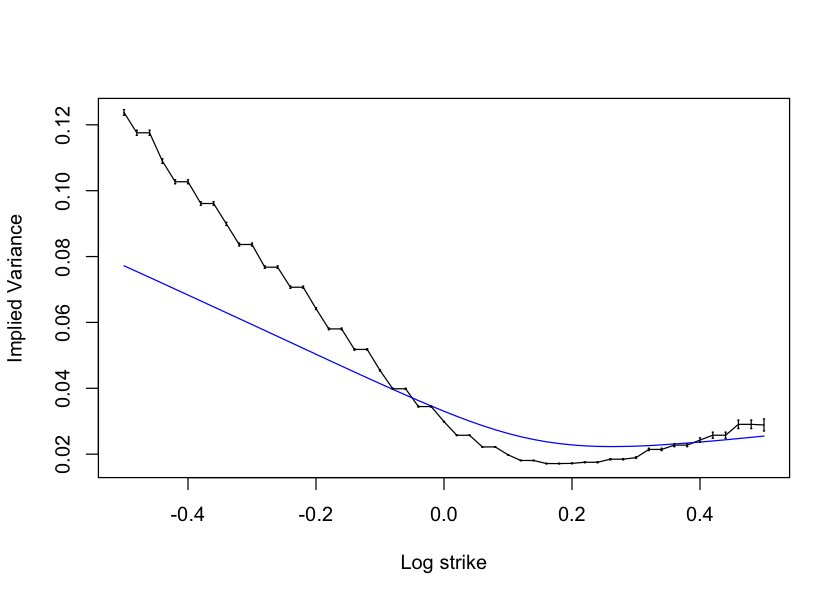

In [12]:
strike<-seq(-0.5,0.5,0.02)
localVarList<-sapply(strike,localVar)
impVarList<-sapply(strike,function(x){(impvolMC(exp(x)))^2})

plot(strike,localVarList[1,],type="l",col="black",xlab="Log strike",ylab="Implied Variance")
lines(strike,impVarList,col="blue")

# plot error bars
ds<-0.001
for(i in 1:length(strike)) {
    high<-localVarList[1,i]+localVarList[2,i]
    low<-localVarList[1,i]-localVarList[2,i]
    segments(strike[i],low,strike[i],high)
    segments(strike[i]-ds, high , strike[i]+ds, high)
    segments(strike[i]-ds, low , strike[i]+ds, low)
}

(f)

Implied variance is bigger than local variance when log strike is between 0 and 0.4, and for other value, the sign is inversed. This can be interpreted by BBF formula 

When $T=0$,

$$
\frac{1}{\sigma_{BS}(k)}=\frac{1}{k}\,\int_0^k\,\frac{dy}{\sigma(y,0)}
$$

Because $\frac{1}{\sigma(k,0)}$ decreases with $k$. For larger K, to make the equation holds, $\frac{1}{\sigma_{BS}(k)}$ is  bigger than $\frac{1}{\sigma(k,0)}$. Means $\sigma_{BS}(k)<\sigma(k,0)$ Also, for small $k\approx 0$, $\sigma_{BS}(k) > \sigma(k,0)$.

<font color='red'>COMMENT: -1 pt. You can also comment on the skew behavior.</font>